# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Описание данных:**

- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита

## Открытие файла и изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/data.csv')
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


**Вывод**

Изучив общую информацию, обращаем внимание на наличие пропусков, отрицательные и дробные значения. В предобработке данных постараемся выявить причины их появления, преоразовать или ликвидировать по необходимости.

## Предобработка данных

### Обработка пропусков

В данных образаем внимание на отрицательные значения общего трудового стажа в днях. 
Функцией abs() возвращаем модуль отрицательных значений.

In [3]:
data['days_employed'] = data['days_employed'].abs()
data.head(20)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Подсчитываем отсутствующие значения.

In [4]:
data.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Одинаковое количество пропусков обнаружено в двух столбцах: отработанные дни (days_employed) и доход (total_income), что логично, так как одно прямо зависит от другого, и при отсутствии рабочих дней будет отсуствовать доход.
Общий трудовой стаж в днях и ежемесячный доход - количественные переменные. 
Заполняем пропуски характерными значениями. В данном случае подойдут медианы. 
1. Находим медианы ежемесячного дохода и трудового стажа для каждого типа занятости
2. Заполняем пропуски на средние значения

In [5]:
data_transformed = data.groupby('income_type')['total_income'].transform('mean')
data_transformed_1=data.groupby('income_type')['days_employed'].transform('mean')

In [6]:
data['total_income'] = data['total_income'].fillna(data_transformed)
data['days_employed'] = data['days_employed'].fillna(data_transformed_1)
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Создаём функцию для определения реальности трудового стажа, так как наблюдаются аномальные выбросы в данном столбце. Значением для ориентира берём 25000 дней (около 69 лет), что поможет отсеять невозможный стаж.

In [7]:
def days_normal(days_employed):
    if days_employed>=25000:
        return 'стаж не определён'
    return 'стаж определён'
data['days_normal']=data['days_employed'].apply(days_normal)

In [8]:
data.head(50)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_normal
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,стаж определён
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,стаж определён
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,стаж определён
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,стаж определён
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,стаж не определён
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья,стаж определён
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем,стаж определён
7,0,152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование,стаж определён
8,2,6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы,стаж определён
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи,стаж определён


Сортируем данные по убыванию по стажу работы для идентификации правильности работы функции

In [9]:
data.sort_values(by = 'days_employed', ascending=False).head(50)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_normal
6954,0,401755.400475,56,среднее,1,вдовец / вдова,2,F,пенсионер,0,176278.441171,ремонт жилью,стаж не определён
10006,0,401715.811749,69,высшее,0,Не женат / не замужем,4,F,пенсионер,0,57390.256908,получение образования,стаж не определён
7664,1,401675.093434,61,среднее,1,женат / замужем,0,F,пенсионер,0,126214.519212,операции с жильем,стаж не определён
2156,0,401674.466633,60,среднее,1,женат / замужем,0,M,пенсионер,0,325395.724541,автомобили,стаж не определён
7794,0,401663.850046,61,среднее,1,гражданский брак,1,F,пенсионер,0,48286.441362,свадьба,стаж не определён
4697,0,401635.032697,56,среднее,1,женат / замужем,0,F,пенсионер,0,48242.322502,покупка недвижимости,стаж не определён
13420,0,401619.633298,63,Среднее,1,гражданский брак,1,F,пенсионер,0,51449.788325,сыграть свадьбу,стаж не определён
17823,0,401614.475622,59,среднее,1,женат / замужем,0,F,пенсионер,0,152769.694536,покупка жилья для сдачи,стаж не определён
10991,0,401591.828457,56,среднее,1,в разводе,3,F,пенсионер,0,39513.517543,получение дополнительного образования,стаж не определён
8369,0,401590.452231,58,среднее,1,женат / замужем,0,F,пенсионер,0,175306.312902,образование,стаж не определён


**Вывод**

Пропуски заполнены.
Возможная причина появления пропусков - непредоставленная информация об общем трудовом стаже.
Создан новый столбец для идентификации реальности трудового стажа.


### Замена типов данных

Ещё раз проверяем типы данных методом info(). 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
 12  days_normal       21525 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


Общий трудовой стаж и ежемесячный доход имеют тип данных float: их необходимо перевести в int.

In [11]:
data['days_employed'] = data['days_employed'].astype(int)
data['total_income'] = data['total_income'].astype(int)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21525 non-null  int64 
 1   days_employed     21525 non-null  int64 
 2   dob_years         21525 non-null  int64 
 3   education         21525 non-null  object
 4   education_id      21525 non-null  int64 
 5   family_status     21525 non-null  object
 6   family_status_id  21525 non-null  int64 
 7   gender            21525 non-null  object
 8   income_type       21525 non-null  object
 9   debt              21525 non-null  int64 
 10  total_income      21525 non-null  int64 
 11  purpose           21525 non-null  object
 12  days_normal       21525 non-null  object
dtypes: int64(7), object(6)
memory usage: 2.1+ MB
None


**Вывод**

Произведена замена типов данных.
Возможная причина появления дробных значений в днях и общем доходе - использование усреднённых значений. 

### Обработка дубликатов

Выбираем уникальные значения и подсчитываю частоту его встречаемости методом value_counts() для каждого столбца с типом данных object.

In [12]:
data['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64

Появление дубликатов в столбце "образование" связано с различными регистрами. Для удаления дубликатов приводим все символы к нижнему регистру. 

In [13]:
data['education'] = data['education'].str.lower()
data['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

In [14]:
data['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

In [15]:
data['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

In [16]:
data['income_type'].value_counts()

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
в декрете              1
студент                1
Name: income_type, dtype: int64

In [17]:
data['purpose'].value_counts()

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
покупка жилья для сдачи                   653
операции с жильем                         653
операции с коммерческой недвижимостью     651
покупка жилья                             647
жилье                                     647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
покупка своего жилья                      620
строительство недвижимости                620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

Проверяем данные на наличие грубых дубликатов

In [18]:
data.duplicated().sum()

71

71 - сравнительно маленькое количество относительно общего объёма данных. Без ущерба удаляем дубликаты.

In [19]:
data = data.drop_duplicates().reset_index(drop=True)
data.duplicated().sum()

0

**Вывод**

Дубликаты обработаны в столбце "образование". Работа с целями получения кредита будет в следующем пункте. Также в столбце "пол" есть одно неясное значение, но, вероятно, оно не влияет на статистику, поэтому трогать его не будем.
Грубые дубликаты удалены.


### Лемматизация

В предыдущем шаге мы обратили внимание на различные формулировки одинаковых целей кредита. Для выявления основных целей и более конкретных формулировок проведём лемматизацию.

In [20]:
from pymystem3 import Mystem
m = Mystem()

#находим уникальные значения в столбце с целями получения кредита
purposes = data['purpose'].unique() 
#создаём строку для дальнейшей лемматизации
purposes_1 = ', '.join(purposes) 
#лемматизируем уникальные значения
lemmas = m.lemmatize(purposes_1) 

from collections import Counter
#подсчитываем леммы
print(Counter(lemmas)) 

data['purpose_1'] = data['purpose'].apply(m.lemmatize)

Counter({' ': 59, ', ': 37, 'покупка': 10, 'недвижимость': 10, 'автомобиль': 9, 'образование': 9, 'жилье': 7, 'с': 5, 'операция': 4, 'на': 4, 'свой': 4, 'свадьба': 3, 'строительство': 3, 'получение': 3, 'высокий': 3, 'дополнительный': 2, 'для': 2, 'коммерческий': 2, 'жилой': 2, 'подержать': 2, 'заниматься': 2, 'сделка': 2, 'приобретение': 1, 'сыграть': 1, 'проведение': 1, 'семья': 1, 'собственный': 1, 'со': 1, 'профильный': 1, 'сдача': 1, 'ремонт': 1, '\n': 1})


**Вывод**

Исходя из полученного результата можно выделить основные цели взятия кредита:
1. Недвижимость
2. Автомобиль
3. Образование
4. Свадьба


### Категоризация данных

Проверяем уникальные значения в данных о количестве детей

In [21]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

Некорректные среди них: 20 и -1

In [22]:
data['children'] = data['children'].abs()

#Предполагаем, что 20 это некорректно записанные 2, и заменяем значения
data['children'] = data['children'].replace(20,2) 
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

Некорректные значения в данных о количестве детей ликвидированы

Пишем функцию для категоризации целей получения кредита. 
Используем результаты лемматизации.

In [23]:
def purpose_all(row):
    if 'свадьба' in row:
        return 'свадьба'
    elif 'образование' in row:
        return 'образование'
    elif 'автомобиль' in row:
        return 'автомобиль'
    else:
        return 'недвижимость'
    
data['purpose_final'] = data['purpose_1'].apply(purpose_all) 
data.head(20)
        

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_normal,purpose_1,purpose_final
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,стаж определён,"[покупка, , жилье, \n]",недвижимость
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,стаж определён,"[приобретение, , автомобиль, \n]",автомобиль
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,стаж определён,"[покупка, , жилье, \n]",недвижимость
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,стаж определён,"[дополнительный, , образование, \n]",образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,стаж не определён,"[сыграть, , свадьба, \n]",свадьба
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,стаж определён,"[покупка, , жилье, \n]",недвижимость
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,стаж определён,"[операция, , с, , жилье, \n]",недвижимость
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,стаж определён,"[образование, \n]",образование
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,стаж определён,"[на, , проведение, , свадьба, \n]",свадьба
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,стаж определён,"[покупка, , жилье, , для, , семья, \n]",недвижимость


Пишем функцию для категоризации наличия детей

In [24]:
def have_children(row):
    if row ==0:
        return 'нет детей'
    return 'есть дети'
data['have_children'] = data['children'].apply(have_children)
data.head()
        

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_normal,purpose_1,purpose_final,have_children
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,стаж определён,"[покупка, , жилье, \n]",недвижимость,есть дети
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,стаж определён,"[приобретение, , автомобиль, \n]",автомобиль,есть дети
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,стаж определён,"[покупка, , жилье, \n]",недвижимость,нет детей
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,стаж определён,"[дополнительный, , образование, \n]",образование,есть дети
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,стаж не определён,"[сыграть, , свадьба, \n]",свадьба,нет детей


В ежемесячном доходе смотрим самые большие и самые маленькие значения.
На основе этой информации категоризируем эти данные.

In [25]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,2.145400e+04
mean,0.480563,67110.479211,43.271231,0.817097,0.973898,0.081150,1.674316e+05
std,0.756069,139165.724349,12.570822,0.548674,1.421567,0.273072,9.806060e+04
min,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,2.066700e+04
25%,0.000000,1023.000000,33.000000,1.000000,0.000000,0.000000,1.076230e+05
50%,0.000000,2326.000000,42.000000,1.000000,0.000000,0.000000,1.518870e+05
75%,1.000000,5320.000000,53.000000,1.000000,1.000000,0.000000,2.024170e+05
max,5.000000,401755.000000,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [26]:
data.sort_values(by = 'total_income', ascending=False).head(50)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_normal,purpose_1,purpose_final,have_children
12390,0,1477,44,высшее,0,женат / замужем,0,M,компаньон,0,2265604,ремонт жилью,стаж определён,"[ремонт, , жилье, \n]",недвижимость,нет детей
19548,1,2577,39,высшее,0,женат / замужем,0,M,компаньон,1,2200852,строительство недвижимости,стаж определён,"[строительство, , недвижимость, \n]",недвижимость,есть дети
9159,1,5248,35,среднее,1,гражданский брак,1,M,сотрудник,0,1726276,дополнительное образование,стаж определён,"[дополнительный, , образование, \n]",образование,есть дети
20742,0,4719,61,среднее,1,Не женат / не замужем,4,F,сотрудник,0,1715018,покупка жилья для семьи,стаж определён,"[покупка, , жилье, , для, , семья, \n]",недвижимость,нет детей
17137,0,5734,42,высшее,0,гражданский брак,1,M,компаньон,0,1711309,сыграть свадьбу,стаж определён,"[сыграть, , свадьба, \n]",свадьба,нет детей
17460,0,2285,43,среднее,1,женат / замужем,0,M,компаньон,0,1597613,операции с недвижимостью,стаж определён,"[операция, , с, , недвижимость, \n]",недвижимость,нет детей
18321,1,333,41,высшее,0,гражданский брак,1,M,компаньон,0,1551152,свадьба,стаж определён,"[свадьба, \n]",свадьба,есть дети
18306,1,3173,41,высшее,0,Не женат / не замужем,4,F,компаньон,0,1427934,автомобиль,стаж определён,"[автомобиль, \n]",автомобиль,есть дети
15234,1,10207,64,высшее,0,в разводе,3,M,компаньон,0,1350245,жилье,стаж определён,"[жилье, \n]",недвижимость,есть дети
11052,1,1851,36,высшее,0,гражданский брак,1,F,сотрудник,0,1286280,покупка коммерческой недвижимости,стаж определён,"[покупка, , коммерческий, , недвижимость, \n]",недвижимость,есть дети


In [27]:
data.sort_values(by = 'total_income', ascending=True).head(50)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_normal,purpose_1,purpose_final,have_children
14555,0,359219,57,среднее,1,женат / замужем,0,F,пенсионер,1,20667,недвижимость,стаж не определён,"[недвижимость, \n]",недвижимость,нет детей
12983,0,369708,37,среднее,1,гражданский брак,1,M,пенсионер,0,21205,заняться высшим образованием,стаж не определён,"[заниматься, , высокий, , образование, \n]",образование,нет детей
16138,1,3642,52,среднее,1,женат / замужем,0,M,сотрудник,0,21367,приобретение автомобиля,стаж определён,"[приобретение, , автомобиль, \n]",автомобиль,есть дети
1598,0,359726,68,среднее,1,гражданский брак,1,M,пенсионер,0,21695,на проведение свадьбы,стаж не определён,"[на, , проведение, , свадьба, \n]",свадьба,нет детей
14247,0,346602,61,среднее,1,женат / замужем,0,F,пенсионер,0,21895,недвижимость,стаж не определён,"[недвижимость, \n]",недвижимость,нет детей
10863,0,347356,71,среднее,1,женат / замужем,0,M,пенсионер,0,22472,операции со своей недвижимостью,стаж не определён,"[операция, , со, , свой, , недвижимость, \n]",недвижимость,нет детей
18461,0,370478,60,среднее,1,женат / замужем,0,F,пенсионер,0,23844,покупка жилья для семьи,стаж не определён,"[покупка, , жилье, , для, , семья, \n]",недвижимость,нет детей
9060,0,340952,60,среднее,1,Не женат / не замужем,4,F,пенсионер,0,24457,операции с коммерческой недвижимостью,стаж не определён,"[операция, , с, , коммерческий, , недвижимо...",недвижимость,нет детей
10053,0,4959,43,среднее,1,женат / замужем,0,F,сотрудник,0,25227,высшее образование,стаж определён,"[высокий, , образование, \n]",образование,нет детей
12032,1,354563,55,начальное,3,гражданский брак,1,F,пенсионер,0,25308,дополнительное образование,стаж не определён,"[дополнительный, , образование, \n]",образование,есть дети


In [28]:
def income_type(row):
    if 20000<=row<=50000: 
        return 'низкий'
    elif 50000<row<=500000:
        return 'средний'
    else:
        return 'высокий'
    
data['income_type'] = data['total_income'].apply(income_type)
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_normal,purpose_1,purpose_final,have_children
0,1,8437,42,высшее,0,женат / замужем,0,F,средний,0,253875,покупка жилья,стаж определён,"[покупка, , жилье, \n]",недвижимость,есть дети
1,1,4024,36,среднее,1,женат / замужем,0,F,средний,0,112080,приобретение автомобиля,стаж определён,"[приобретение, , автомобиль, \n]",автомобиль,есть дети
2,0,5623,33,среднее,1,женат / замужем,0,M,средний,0,145885,покупка жилья,стаж определён,"[покупка, , жилье, \n]",недвижимость,нет детей
3,3,4124,32,среднее,1,женат / замужем,0,M,средний,0,267628,дополнительное образование,стаж определён,"[дополнительный, , образование, \n]",образование,есть дети
4,0,340266,53,среднее,1,гражданский брак,1,F,средний,0,158616,сыграть свадьбу,стаж не определён,"[сыграть, , свадьба, \n]",свадьба,нет детей
5,0,926,27,высшее,0,гражданский брак,1,M,средний,0,255763,покупка жилья,стаж определён,"[покупка, , жилье, \n]",недвижимость,нет детей
6,0,2879,43,высшее,0,женат / замужем,0,F,средний,0,240525,операции с жильем,стаж определён,"[операция, , с, , жилье, \n]",недвижимость,нет детей
7,0,152,50,среднее,1,женат / замужем,0,M,средний,0,135823,образование,стаж определён,"[образование, \n]",образование,нет детей
8,2,6929,35,высшее,0,гражданский брак,1,F,средний,0,95856,на проведение свадьбы,стаж определён,"[на, , проведение, , свадьба, \n]",свадьба,есть дети
9,0,2188,41,среднее,1,женат / замужем,0,M,средний,0,144425,покупка жилья для семьи,стаж определён,"[покупка, , жилье, , для, , семья, \n]",недвижимость,нет детей


Создаём таблицу с необходимыми данными для исследования

In [29]:
data_final = data[['family_status', 'income_type', 'purpose_final', 'have_children', 'debt', 'education_id']]
data_final.head(10)

,family_status,income_type,purpose_final,have_children,debt,education_id
0,женат / замужем,средний,недвижимость,есть дети,0,0
1,женат / замужем,средний,автомобиль,есть дети,0,1
2,женат / замужем,средний,недвижимость,нет детей,0,1
3,женат / замужем,средний,образование,есть дети,0,1
4,гражданский брак,средний,свадьба,нет детей,0,1
5,гражданский брак,средний,недвижимость,нет детей,0,0
6,женат / замужем,средний,недвижимость,нет детей,0,0
7,женат / замужем,средний,образование,нет детей,0,1
8,гражданский брак,средний,свадьба,есть дети,0,0
9,женат / замужем,средний,недвижимость,нет детей,0,1


**Вывод**

1. Отрицательные значения в днях трудового стажа - данные, не отображающие действительность. Возможной причиной появления таких данных  может стать изначальная запись (трудовой стаж - 8437 дней), и при формировании таблицы неудалённое тире считывается как минус. При любом раскладе считаем, что пояление минуса - случайность.

2. Для дальнейшего анализа зависимости необходимо привести в порядок данные о детях (как минимум убрать отрицательные значения), что мы и сделали. Отрицательные значения могли появиться по тому же принципу, который был описан первом пункте. Значение 20 маловероятно, возможно, изначально предполагалось как 2.0, и при преобразовании в целое число на каком-то этапе неверно было зафиксировано. 

3. Также категоризируем данные о целях получения кредита на основе результата лемматизации и с помощью функции, создав новый столбец, так как одни и те же цели были записаны в разных формулировках. Также категоризируем данные о доходах.

4. Создаём финальную таблицу с необходимыми данными.

## Определение зависимостей

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

[Text(0.5, 1.0, 'зависимость между наличием детей и возвратом кредита в срок')]

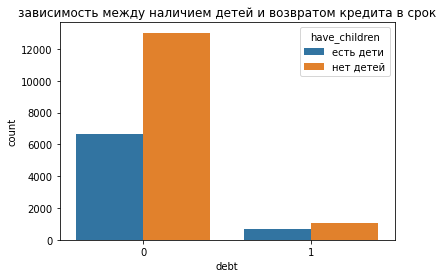

In [30]:
sns.countplot(x='debt', hue='have_children', data=data_final).set(title='зависимость между наличием детей и возвратом кредита в срок')


In [31]:
data_pivot = data_final.pivot_table(index='have_children', columns = 'debt', values ='education_id', aggfunc = 'count')

data_pivot['all'] = data_pivot[1]+data_pivot[0]
data_pivot['ratio'] = data_pivot[1]/data_pivot['all']*100
data_pivot

debt,0,1,all,ratio
have_children,,,,
есть дети,6685,678,7363,9.208203
нет детей,13028,1063,14091,7.543822


**Вывод**

Различие небольшое, но на основе данной информации можно сделать вывод, что клиенты без детей чаще возвращают кредит в срок.
Дети требуют дополнительных расходов, а эти расходы могут быть внезапными и незапланированными. Поэтому люди с детьми имеют больше задолженностей.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

[Text(0.5, 1.0, 'зависимость между семейным положением и возвратом кредита в срок')]

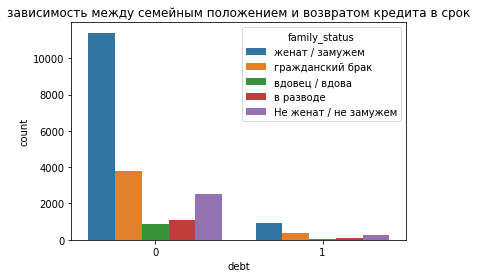

In [32]:
sns.countplot(x='debt', hue='family_status', data=data_final).set(title='зависимость между семейным положением и возвратом кредита в срок')

In [33]:
data_pivot = data_final.pivot_table(index='family_status', columns = 'debt', values ='education_id', aggfunc = 'count')
data_pivot['all'] = data_pivot[1]+data_pivot[0]
data_pivot['ratio'] = data_pivot[1]/data_pivot['all']*100
data_pivot

debt,0,1,all,ratio
family_status,,,,
Не женат / не замужем,2536,274,2810,9.750890
в разводе,1110,85,1195,7.112971
вдовец / вдова,896,63,959,6.569343
гражданский брак,3763,388,4151,9.347145
женат / замужем,11408,931,12339,7.545182


**Вывод**

Наблюдается зависимость между семейным положением и возвратом кредита в срок. Больше всего задолженностей имеют не женатые/не замужние и люди, состоящие в гражданском браке. Самый низкий процент задолженностей у вдовцов/вдов и разведённых клиентов.

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

[Text(0.5, 1.0, 'зависимость между уровнем дохода и возвратом кредита в срок')]

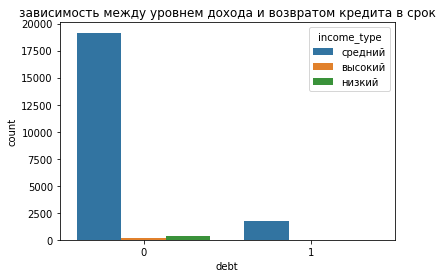

In [34]:
sns.countplot(x='debt', hue='income_type', data=data_final).set(title='зависимость между уровнем дохода и возвратом кредита в срок')

In [35]:
data_pivot = data_final.pivot_table(index='income_type', columns = 'debt', values ='education_id', aggfunc = 'count')
data_pivot['all'] = data_pivot[1]+data_pivot[0]
data_pivot['ratio'] = data_pivot[1]/data_pivot['all']*100
data_pivot

debt,0,1,all,ratio
income_type,,,,
высокий,208,14,222,6.306306
низкий,349,23,372,6.182796
средний,19156,1704,20860,8.168744


**Вывод**

Люди со средним уровнем дохода реже возвращают кредит в срок.

- Как разные цели кредита влияют на его возврат в срок?

[Text(0.5, 1.0, 'зависимость между целями кредита и возвратом кредита в срок')]

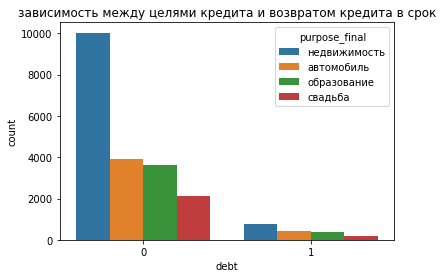

In [36]:
sns.countplot(x='debt', hue='purpose_final', data=data_final).set(title='зависимость между целями кредита и возвратом кредита в срок')

In [37]:
data_pivot = data_final.pivot_table(index='purpose_final', columns = 'debt', values ='education_id', aggfunc = 'count')
data_pivot['all'] = data_pivot[1]+data_pivot[0]
data_pivot['ratio'] = data_pivot[1]/data_pivot['all']*100
data_pivot

debt,0,1,all,ratio
purpose_final,,,,
автомобиль,3903,403,4306,9.359034
недвижимость,10029,782,10811,7.233373
образование,3643,370,4013,9.220035
свадьба,2138,186,2324,8.003442


**Вывод**

Больше всего задолженностей у клиентов, которые брали кредит на образование и автомобиль.
Более низкий процент задолженностей по целям "свадьба" и "недвижимость".

Цены на образование с каждым годом растут, и можно предположить, что клиенты не рассчитывают должным образом свой бюджет относительно этой составляющей. 


## Общий вывод

Проведя предобработку данных, можно сделать следующие выводы.
Реже возвращают кредит в срок:
1. Клиенты с детьми
2. Не женатые/не замужем
3. Состоящие в гражданском браке
4. Клиенты со средним уровнем дохода
5. Клиенты, берущие кредит на образование и автомобиль

Банку стоит обратить внимание на данные категории при принятии решений выдачи кредита.